# Showering in new muon sample (10k muons)
In this notebook, we aim to study the showering of high-charge particles (i.e. neutrons) cause by the rock that surrounds the main volume.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

filepath = os.path.join("..", "Data", "output10000.csv")
filepath_old = os.path.join("..", "Data", "output123456789.csv")
df = pd.read_csv(filepath, index_col=False)
df_old = pd.read_csv(filepath_old, index_col=False)

neutrons_new = df[df.PID==2112]
neutrons_old = df_old[df_old.PID==2112]

print("[Old data] Neutron entries: {}".format(len(neutrons_old)))
print("[New data] Neutron entries: {}".format(len(neutrons_new)))

[Old data] Neutron entries: 446
[New data] Neutron entries: 6651


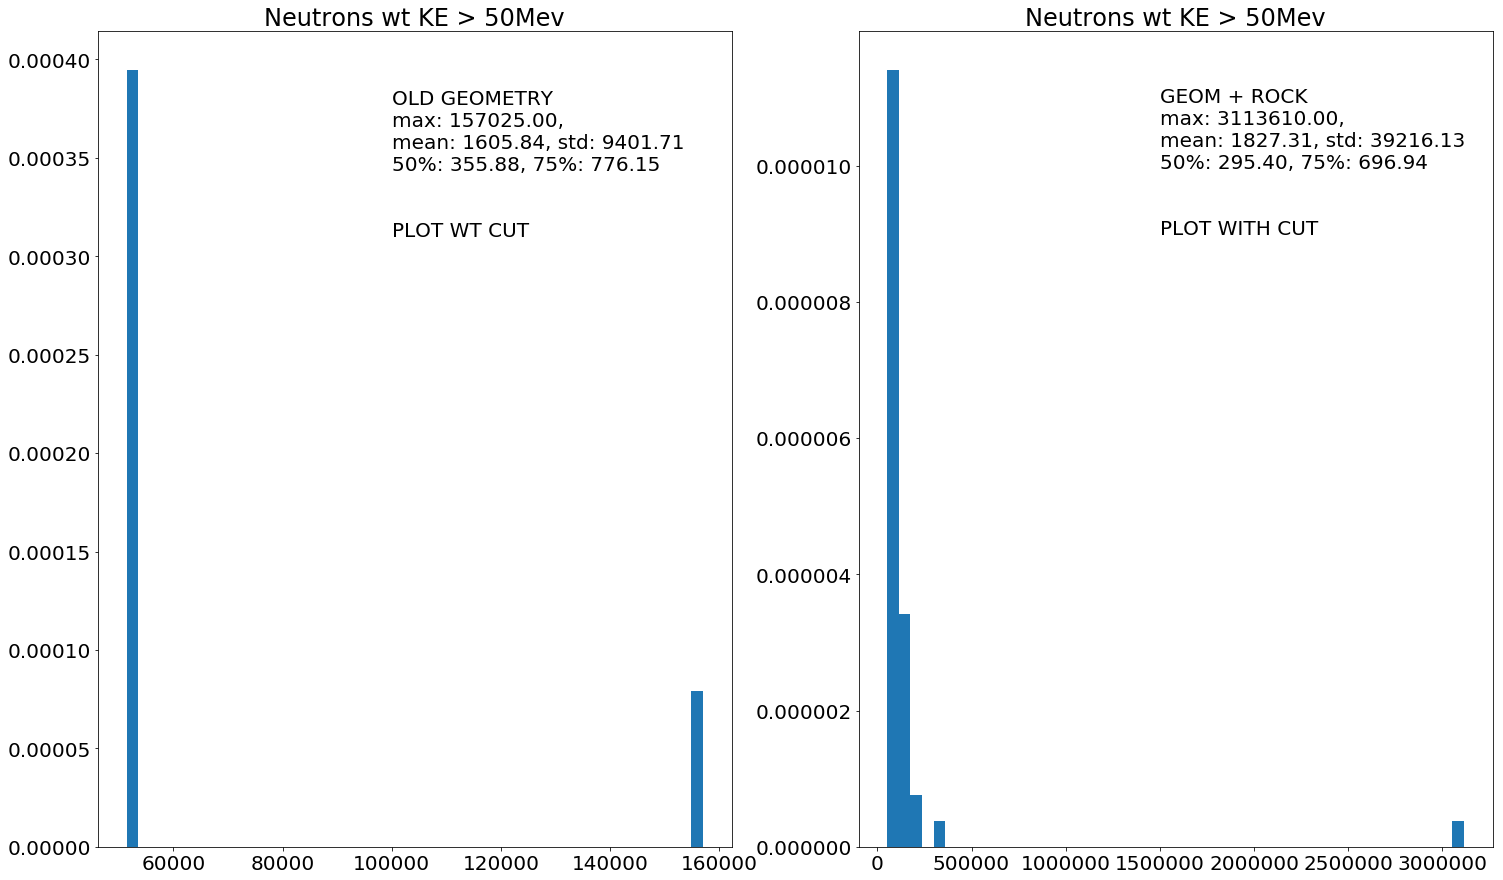

,count,mean,std,min,25%,50%,75%,max
old_geom,446.0,1605.842141,9401.711711,0.0,89.278225,355.877,776.146,157025.0
geom+rock,6651.0,1827.310211,39216.131289,0.0,94.972500,295.401,696.943,3113610.0


In [95]:
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

old_stat = neutrons_old.kineticenergy.describe()
new_stat = neutrons_new.kineticenergy.describe()
stat=pd.DataFrame([old_stat, new_stat], index=["old_geom", "geom+rock"])

old_high_neutrons = neutrons_old[neutrons_old.kineticenergy > 50000]
new_high_neutrons = neutrons_new[neutrons_new.kineticenergy > 50000]

plt.subplot(1, 2, 1)
plt.hist(old_high_neutrons.kineticenergy, 50, density=True)
ma, mean, std, p50, p75 = stat.loc['old_geom', ['max', 'mean', 'std', '50%', '75%']]
label = "OLD GEOMETRY\n" \
        "max: {:.2f},\n" \
        "mean: {:.2f}, std: {:.2f}\n"  \
        "50%: {:.2f}, 75%: {:.2f}" \
        "\n\n\n" \
        "PLOT WT CUT".format(ma, mean, std, p50, p75)
plt.text(100000, 0.00031, label)
plt.title("Neutrons wt KE > 50Mev")

plt.subplot(1, 2, 2)
plt.hist(new_high_neutrons.kineticenergy, 50, density=True)
ma, mean, std, p50, p75 = stat.loc['geom+rock', ['max', 'mean', 'std', '50%', '75%']]
label = "GEOM + ROCK\n" \
        "max: {:.2f},\n" \
        "mean: {:.2f}, std: {:.2f}\n"  \
        "50%: {:.2f}, 75%: {:.2f}" \
        "\n\n\n" \
        "PLOT WITH CUT".format(ma, mean, std, p50, p75)
plt.text(1500000, 0.000009, label)
plt.title("Neutrons wt KE > 50Mev")
plt.show()

stat

In [105]:
neutrons_old.groupby(["eventnumber"]).tracknumber.nunique().sum()
42

42

In [108]:
neutrons_new.groupby(["eventnumber"]).tracknumber.nunique().sum()
df.eventnumber.nunique()

len(df)

1792342

## Observations:
1. The number of neutrons hasn't scaled linearly. In the old dataset, the distinct neutron tracks were `42`, whilst the new dataset contains `552` neutron tracks. Considering that the new dataset has 884 events